# Pricing Analysis for a Window Cleaning Business
This project analyzes how different job characteristics affect pricing in a window cleaning business. Using a real-world dataset, we explore trends, visualize relationships, and build predictive models to assist in setting fair and consistent prices.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso as LS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Preprocessing

In [2]:
#Reading the file and showing the first ten rows
df = pd.read_csv('Book 4(Make Your Own).csv')
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CUSTOMER ID,PROPERT TYPE,FLOORS,SIZE,DISTANCE (MILES),DIFFICULTY,DURATION (MINUTES),FREQUENCY (WEEKS),PRICE
2,1,END OF TERRACE,3,MEDIUM,2,MEDIUM,45,NaN,30
3,2,DETACHED,2,LARGE,UNDER 1,EASY,30,NaN,30
4,3,DETACHED,2,LARGE,UNDER 1,EASY,30,8,25
5,4,DETACHED,2,MEDIUM,10,EASY,30,NaN,30
6,5,SEMI,2,SMALL,6,EASY,30,12,25
7,6,DETACHED,2,MEDIUM,6,EASY,30,4,25
8,7,SEMI,2,SMALL,17,EASY,30,NaN,25
9,8,STORE FRONT,1,VERY SMALL,5,EASY,30,4,30


In [3]:
#Changing header
df.rename(columns={'Unnamed: 0': 'Customer_id', 'Unnamed: 1': 'Property_type', 'Unnamed: 2': 'Floors' , 'Unnamed: 3': 'Size', 'Unnamed: 4': 'Distance_miles', 'Unnamed: 5': 'Difficulty', 'Unnamed: 6': 'Duration_mins', 'Unnamed: 7': 'Frequency_weeks', 'Unnamed: 8': 'Price' }, inplace=True)

In [4]:
df.head(10)

,Customer_id,Property_type,Floors,Size,Distance_miles,Difficulty,Duration_mins,Frequency_weeks,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CUSTOMER ID,PROPERT TYPE,FLOORS,SIZE,DISTANCE (MILES),DIFFICULTY,DURATION (MINUTES),FREQUENCY (WEEKS),PRICE
2,1,END OF TERRACE,3,MEDIUM,2,MEDIUM,45,NaN,30
3,2,DETACHED,2,LARGE,UNDER 1,EASY,30,NaN,30
4,3,DETACHED,2,LARGE,UNDER 1,EASY,30,8,25
5,4,DETACHED,2,MEDIUM,10,EASY,30,NaN,30
6,5,SEMI,2,SMALL,6,EASY,30,12,25
7,6,DETACHED,2,MEDIUM,6,EASY,30,4,25
8,7,SEMI,2,SMALL,17,EASY,30,NaN,25
9,8,STORE FRONT,1,VERY SMALL,5,EASY,30,4,30


In [5]:
#Filling missing values with 0 in frequency column
df['Frequency_weeks'] = df['Frequency_weeks'].fillna(0)
df.head(10)

,Customer_id,Property_type,Floors,Size,Distance_miles,Difficulty,Duration_mins,Frequency_weeks,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,CUSTOMER ID,PROPERT TYPE,FLOORS,SIZE,DISTANCE (MILES),DIFFICULTY,DURATION (MINUTES),FREQUENCY (WEEKS),PRICE
2,1,END OF TERRACE,3,MEDIUM,2,MEDIUM,45,0,30
3,2,DETACHED,2,LARGE,UNDER 1,EASY,30,0,30
4,3,DETACHED,2,LARGE,UNDER 1,EASY,30,8,25
5,4,DETACHED,2,MEDIUM,10,EASY,30,0,30
6,5,SEMI,2,SMALL,6,EASY,30,12,25
7,6,DETACHED,2,MEDIUM,6,EASY,30,4,25
8,7,SEMI,2,SMALL,17,EASY,30,0,25
9,8,STORE FRONT,1,VERY SMALL,5,EASY,30,4,30


In [6]:
#Dropping the first two unnecessary rows
df.drop(index=[0, 1], inplace=True)

In [7]:
#Dropping customer id column
df.drop(columns=['Customer_id'], inplace=True)

In [8]:
#Changing under 1 to 1 in distance column
df['Distance_miles'] = df['Distance_miles'].replace('UNDER 1', '1')

In [9]:
# Remove spaces from 'Property_type' and convert to uppercase
df['Property_type'] = df['Property_type'].str.strip().str.upper()

# Display the unique values in Property_type after cleaning
print("Unique values in 'Property_type' after cleaning:")
print(df['Property_type'].unique())

Unique values in 'Property_type' after cleaning:
['END OF TERRACE' 'DETACHED' 'SEMI' 'STORE FRONT' 'BUNGALOW' 'TERRACE'
 'FLAT' nan]


In [10]:
#Resetting index
df.reset_index(drop=True, inplace=True)

In [11]:
#Checking changes completed
df.head(50)

,Property_type,Floors,Size,Distance_miles,Difficulty,Duration_mins,Frequency_weeks,Price
0,END OF TERRACE,3,MEDIUM,2,MEDIUM,45,0,30
1,DETACHED,2,LARGE,1,EASY,30,0,30
2,DETACHED,2,LARGE,1,EASY,30,8,25
3,DETACHED,2,MEDIUM,10,EASY,30,0,30
4,SEMI,2,SMALL,6,EASY,30,12,25
5,DETACHED,2,MEDIUM,6,EASY,30,4,25
6,SEMI,2,SMALL,17,EASY,30,0,25
7,STORE FRONT,1,VERY SMALL,5,EASY,30,4,30
8,BUNGALOW,1,MEDIUM,10,EASY,30,8,20
9,DETACHED,2,MEDIUM,6,EASY,30,6,30


In [12]:
#Checking last ten rows
df.tail(10)

,Property_type,Floors,Size,Distance_miles,Difficulty,Duration_mins,Frequency_weeks,Price
118,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [13]:
#Counting missing values in dataframe
df.isnull().sum()

,0
Property_type,11
Floors,11
Size,11
Distance_miles,11
Difficulty,11
Duration_mins,11
Frequency_weeks,0
Price,11


In [14]:
#Dropping missing values(last 11 rows)
df.dropna(inplace=True)

In [15]:
#Making sure no more missing values
df.isnull().sum()

,0
Property_type,0
Floors,0
Size,0
Distance_miles,0
Difficulty,0
Duration_mins,0
Frequency_weeks,0
Price,0


In [16]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Property_type    117 non-null    object
 1   Floors           117 non-null    object
 2   Size             117 non-null    object
 3   Distance_miles   117 non-null    object
 4   Difficulty       117 non-null    object
 5   Duration_mins    117 non-null    object
 6   Frequency_weeks  117 non-null    object
 7   Price            117 non-null    object
dtypes: object(8)
memory usage: 8.2+ KB


In [17]:
#Change sizing to numbers 1-5
size_mapping = {'VERY SMALL': 1, 'SMALL': 2, 'MEDIUM': 3, 'LARGE': 4, 'VERY LARGE': 5}
df['Size'] = df['Size'].replace(size_mapping)
display(df.head())

/tmp/ipython-input-17-340403732.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Size'] = df['Size'].replace(size_mapping)


,Property_type,Floors,Size,Distance_miles,Difficulty,Duration_mins,Frequency_weeks,Price
0,END OF TERRACE,3,3,2,MEDIUM,45,0,30
1,DETACHED,2,4,1,EASY,30,0,30
2,DETACHED,2,4,1,EASY,30,8,25
3,DETACHED,2,3,10,EASY,30,0,30
4,SEMI,2,2,6,EASY,30,12,25


In [18]:
#Change difficulty to numbers 1-3
difficulty_mapping = {'EASY': 1, 'MEDIUM': 2, 'HARD': 3}
df['Difficulty'] = df['Difficulty'].replace(difficulty_mapping)
display(df.head())

/tmp/ipython-input-18-1518411370.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Difficulty'] = df['Difficulty'].replace(difficulty_mapping)


,Property_type,Floors,Size,Distance_miles,Difficulty,Duration_mins,Frequency_weeks,Price
0,END OF TERRACE,3,3,2,2,45,0,30
1,DETACHED,2,4,1,1,30,0,30
2,DETACHED,2,4,1,1,30,8,25
3,DETACHED,2,3,10,1,30,0,30
4,SEMI,2,2,6,1,30,12,25


In [19]:
#Convert columns to numerical
columns_to_convert = [ 'Floors', 'Size', 'Distance_miles', 'Difficulty', 'Duration_mins', 'Frequency_weeks', 'Price']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Property_type    117 non-null    object
 1   Floors           117 non-null    int64 
 2   Size             117 non-null    int64 
 3   Distance_miles   117 non-null    int64 
 4   Difficulty       117 non-null    int64 
 5   Duration_mins    117 non-null    int64 
 6   Frequency_weeks  117 non-null    int64 
 7   Price            117 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.2+ KB


None

## Analysis

In [20]:
#Statistics
df.describe()

,Floors,Size,Distance_miles,Difficulty,Duration_mins,Frequency_weeks,Price
count,117.000000,117.00000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.846154,2.57265,9.717949,1.307692,31.923077,6.410256,27.350427
std,0.638092,1.12431,9.549189,0.532747,9.953473,4.079287,6.248195
min,1.000000,1.00000,1.000000,1.000000,15.000000,0.000000,10.000000
25%,1.000000,2.00000,3.000000,1.000000,30.000000,4.000000,25.000000
50%,2.000000,3.00000,6.000000,1.000000,30.000000,6.000000,25.000000
75%,2.000000,3.00000,15.000000,2.000000,30.000000,8.000000,30.000000
max,4.000000,5.00000,32.000000,3.000000,75.000000,26.000000,60.000000


Price vs duration

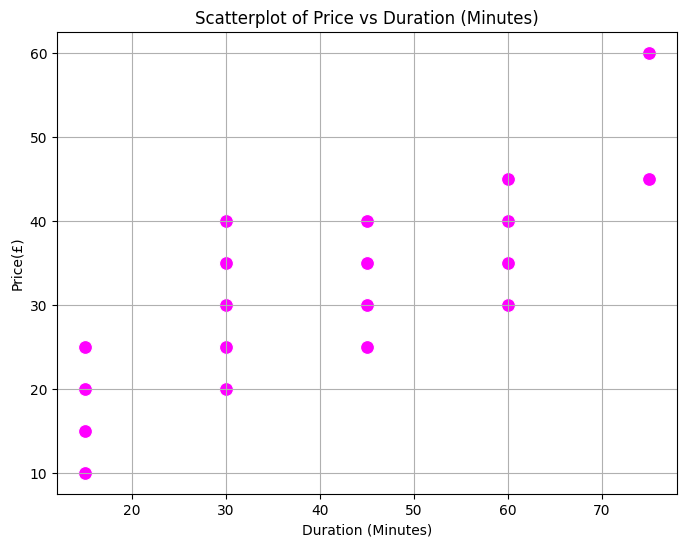

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration_mins', y='Price', data=df, color='magenta', s=100)
plt.title('Scatterplot of Price vs Duration (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price(£)')
plt.grid(True)
plt.show()

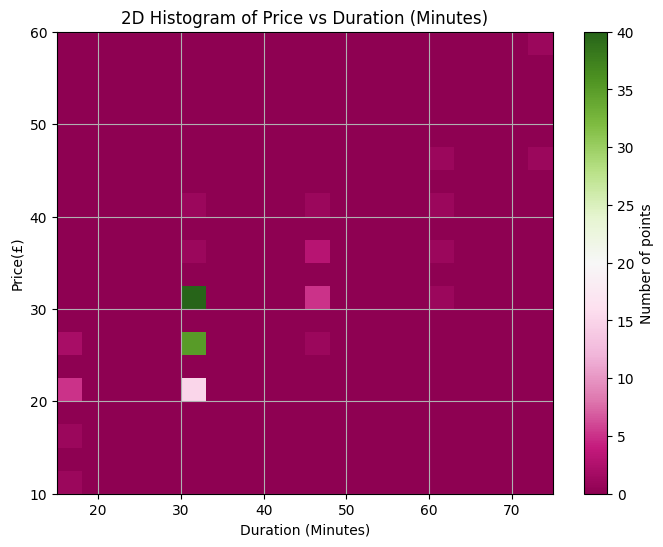

In [22]:
plt.figure(figsize=(8, 6))
plt.hist2d(df['Duration_mins'], df['Price'], bins=(20, 20), cmap='PiYG')
plt.colorbar(label='Number of points')
plt.title('2D Histogram of Price vs Duration (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price(£)')
plt.grid(True)
plt.show()

Distribution of different sizes

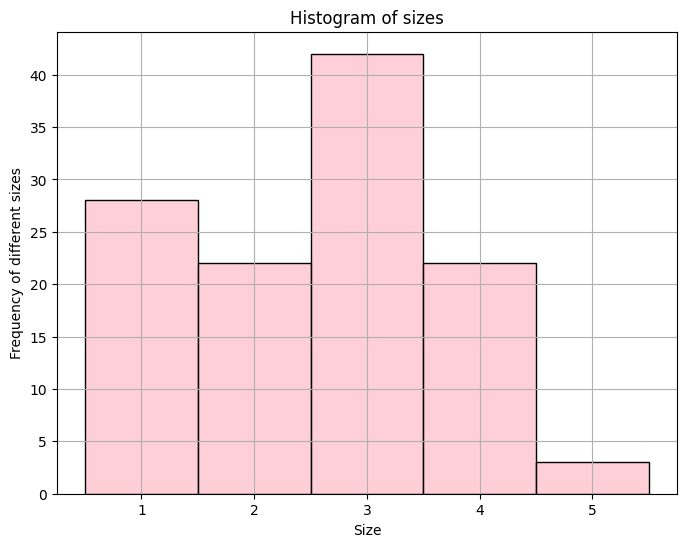

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Size', bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color='pink')
plt.title('Histogram of sizes')
plt.xlabel('Size')
plt.ylabel('Frequency of different sizes')
plt.xticks([1, 2, 3, 4, 5]) # Set explicit x-ticks
plt.grid(True)
plt.show()

In [24]:
display(size_mapping)

{'VERY SMALL': 1, 'SMALL': 2, 'MEDIUM': 3, 'LARGE': 4, 'VERY LARGE': 5}

Price vs size

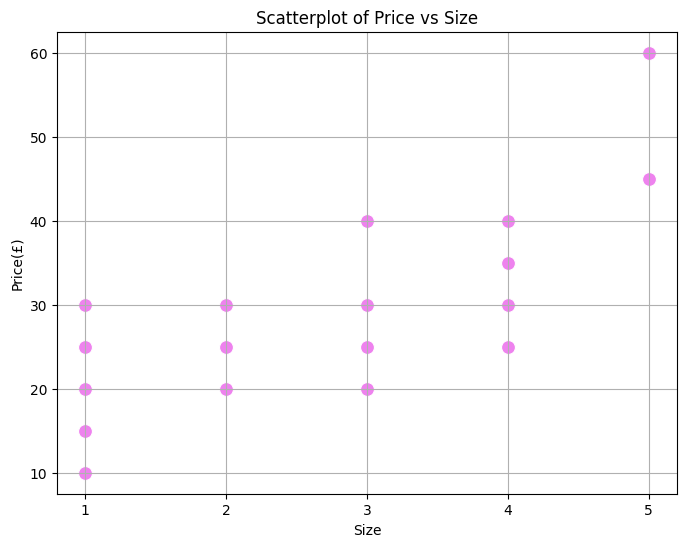

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Size', y='Price', data=df, color='violet', s=100)
plt.title('Scatterplot of Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price(£)')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

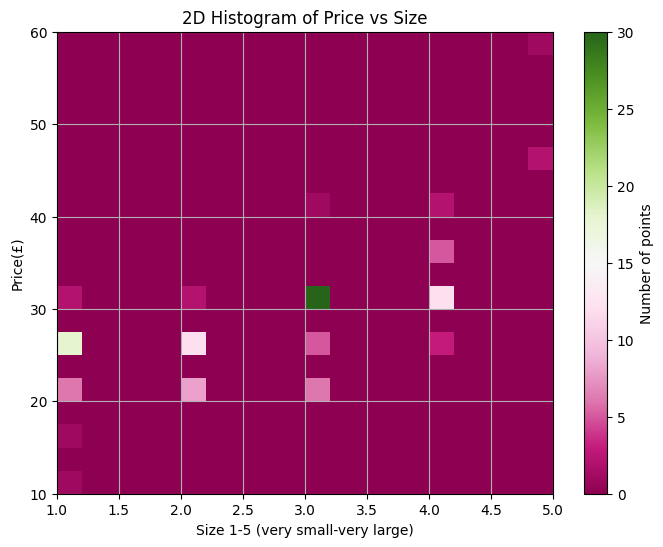

In [26]:
plt.figure(figsize=(8, 6))
plt.hist2d(df['Size'], df['Price'], bins=(20, 20), cmap='PiYG')
plt.colorbar(label='Number of points')
plt.title('2D Histogram of Price vs Size')
plt.xlabel('Size 1-5 (very small-very large)')
plt.ylabel('Price(£)')
plt.grid(True)
plt.show()

Distribution of distances

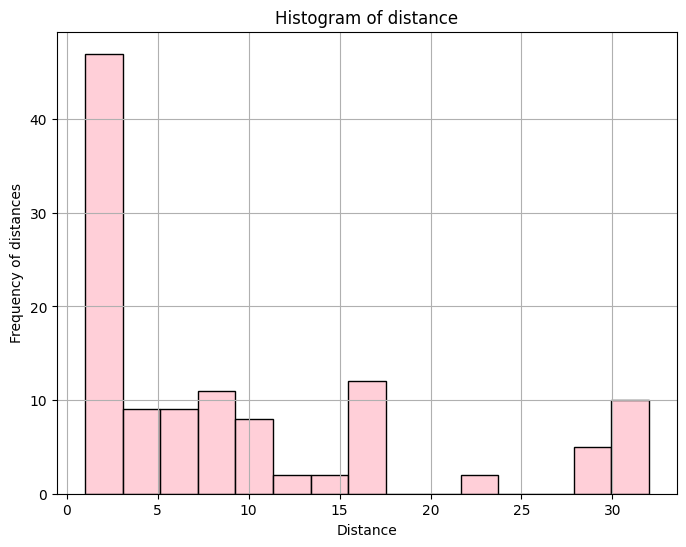

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Distance_miles', bins=15, color='pink')
plt.title('Histogram of distance')
plt.xlabel('Distance')
plt.ylabel('Frequency of distances')
plt.grid(True)
plt.show()

Price vs distance

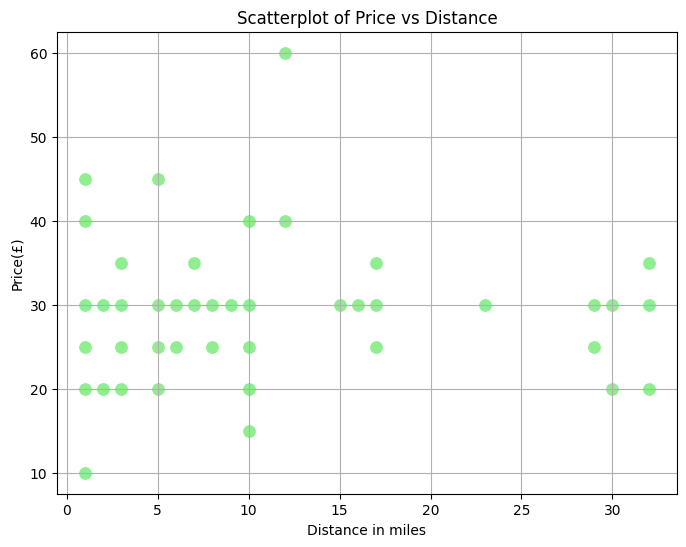

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance_miles', y='Price', data=df, color='lightgreen', s=100)
plt.title('Scatterplot of Price vs Distance')
plt.xlabel('Distance in miles')
plt.ylabel('Price(£)')
plt.grid(True)
plt.show()

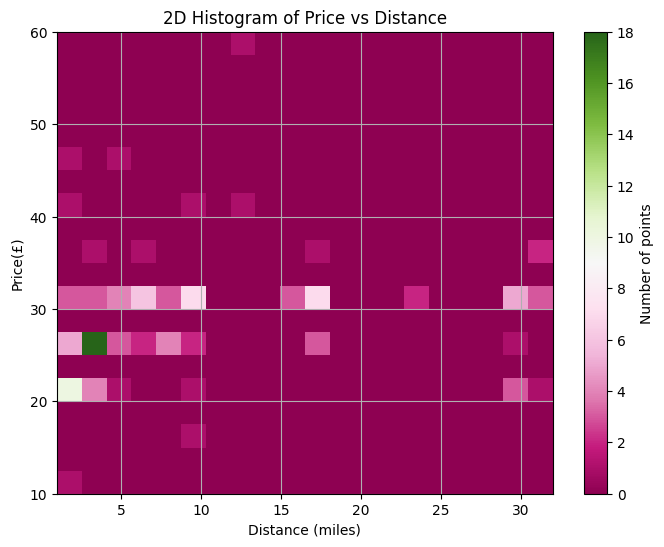

In [29]:
plt.figure(figsize=(8, 6))
plt.hist2d(df['Distance_miles'], df['Price'], bins=(20, 20), cmap='PiYG')
plt.colorbar(label='Number of points')
plt.title('2D Histogram of Price vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Price(£)')
plt.grid(True)
plt.show()

Price vs difficulty

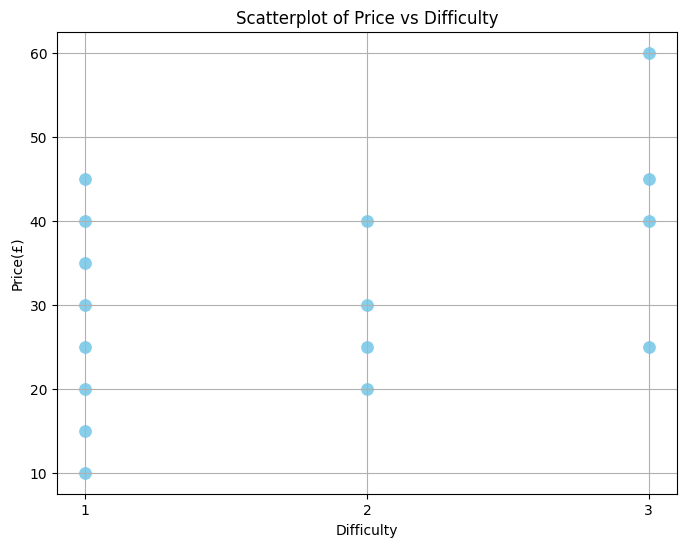

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Difficulty', y='Price', data=df, color='skyblue', s=100)
plt.title('Scatterplot of Price vs Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Price(£)')
plt.xticks([1, 2, 3])
plt.grid(True)
plt.show()

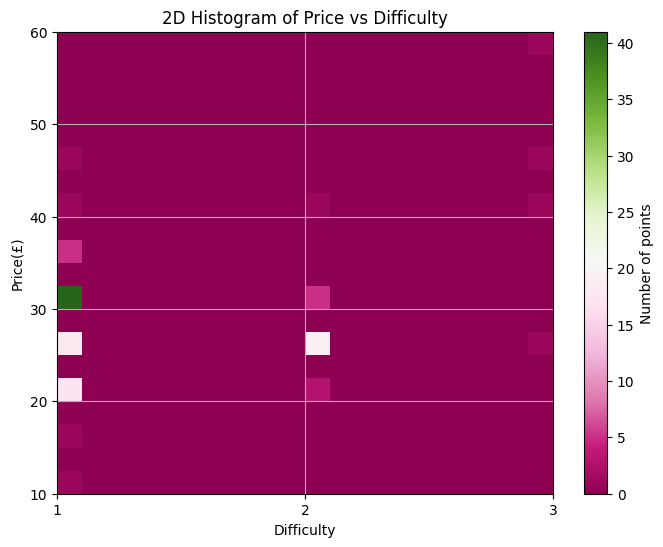

In [31]:
plt.figure(figsize=(8, 6))
plt.hist2d(df['Difficulty'], df['Price'], bins=(20,20), cmap='PiYG')
plt.colorbar(label='Number of points')
plt.title('2D Histogram of Price vs Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Price(£)')
plt.xticks([1, 2, 3])
plt.grid(True)
plt.show()

Price vs property type

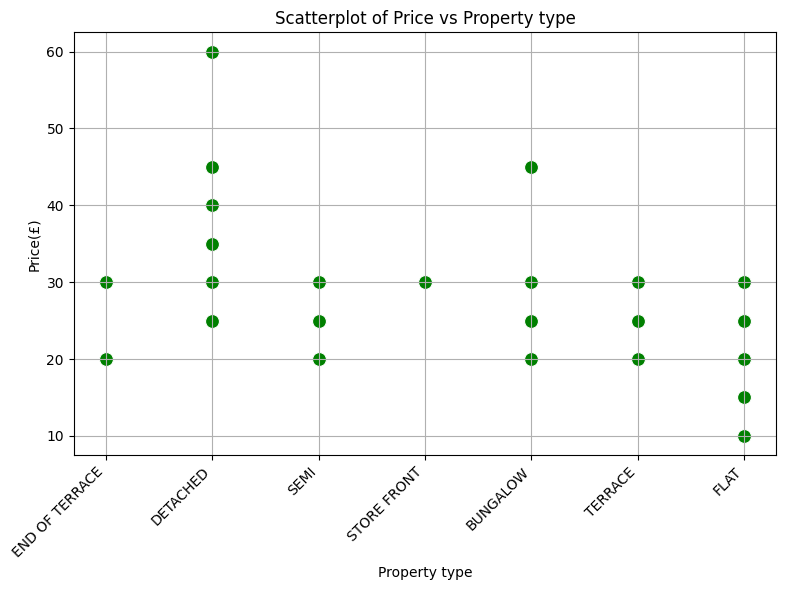

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Property_type', y='Price', data=df, color='green', s=100)
plt.title('Scatterplot of Price vs Property type')
plt.xlabel('Property type')
plt.ylabel('Price(£)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


Average price by property type

/tmp/ipython-input-33-985243457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_property_type.index, y=average_price_by_property_type.values, palette='viridis')


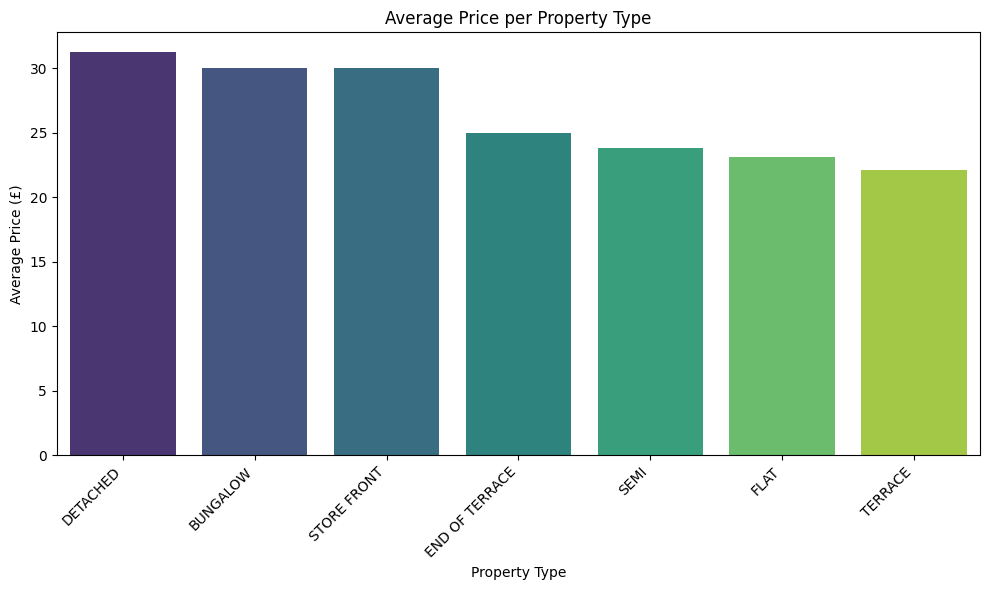

In [33]:

average_price_by_property_type = df.groupby('Property_type')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_property_type.index, y=average_price_by_property_type.values, palette='viridis')
plt.title('Average Price per Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Random forest regression model

In [33]:
X=df[['Property_type','Floors',	'Size',	'Distance_miles',	'Difficulty',	'Duration_mins',	'Frequency_weeks']]
y=df['Price']

In [42]:
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # 80% train, 20% test split
model = RandomForestRegressor(n_estimators=500, max_depth=20, random_state=0, oob_score=True)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=500, oob_score=True,
                      random_state=0)

In [76]:
feature_columns = model.feature_names_in_
new_property_dict = {col: 0 for col in feature_columns}

new_property_dict.update({
    'Floors': 2,
    'Size': 5,
    'Distance_miles': 20.0,
    'Difficulty': 1,
    'Duration_mins': 75,
    'Frequency_weeks': 1,

   'Property_type_FLAT': 1
    # set only one Property_type_ column to 1
})

new_property_data = pd.DataFrame([new_property_dict], columns=feature_columns)


predicted_price = model.predict(new_property_data)

print(f'The predicted price for the new property is: £{predicted_price[0]:.2f}')

The predicted price for the new property is: £47.94


In [77]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None]
}


rf = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x, y)


best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'max_depth': 10, 'n_estimators': 200}


Feature Importances:


,0
Size,0.252454
Property_type,0.244792
Duration_mins,0.207355
Distance_miles,0.144338
Frequency_weeks,0.055865
Floors,0.055835
Difficulty,0.039361


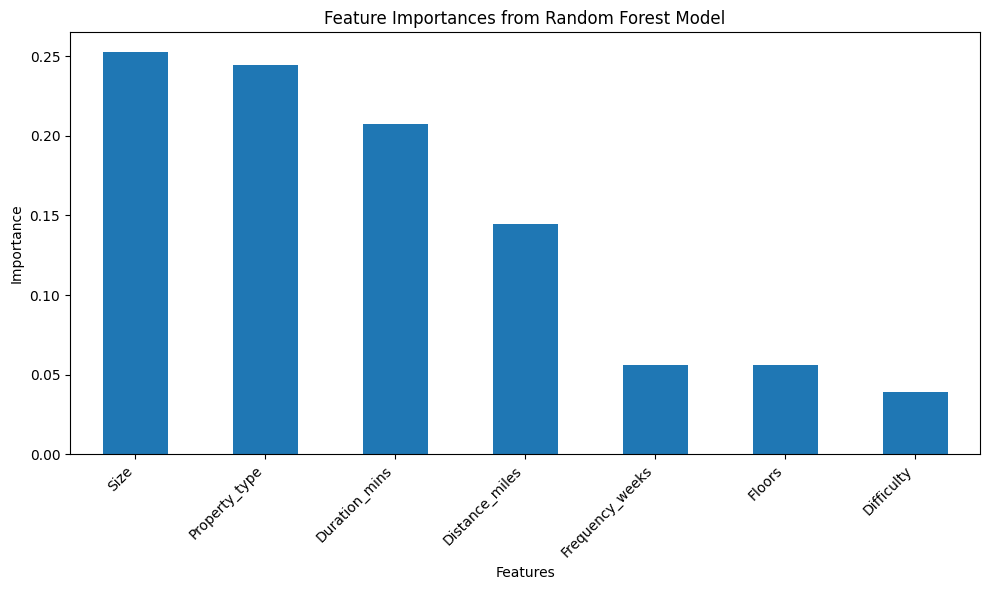

In [83]:
feature_importances = model.feature_importances_
feature_names = model.feature_names_in_

importance_series = pd.Series(feature_importances, index=feature_names)

sorted_importance_series = importance_series.sort_values(ascending=False)

print("Feature Importances:")

display(sorted_importance_series)
plt.figure(figsize=(10, 6))
sorted_importance_series.plot(kind='bar')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R-squared on Test Set: {r2_test}')

Mean Squared Error on Test Set: 16.07439750925793
R-squared on Test Set: 0.49611684542407797


##Polynomial regression

In [85]:
degree = 2
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
x =df[[ 'Difficulty','Size','Duration_mins','Distance_miles']]
y =df['Price']
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x, y, test_size=0.3, random_state=42)
model2.fit(x_train_poly, y_train_poly)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [86]:
y_pred_poly=model2.predict(x_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Mean Squared Error (Polynomial Regression) on Test Set: {mse_poly:.2f}")
print(f"R-squared (Polynomial Regression) on Test Set: {r2_poly:.2f}")

Mean Squared Error (Polynomial Regression) on Test Set: 10.49
R-squared (Polynomial Regression) on Test Set: 0.61


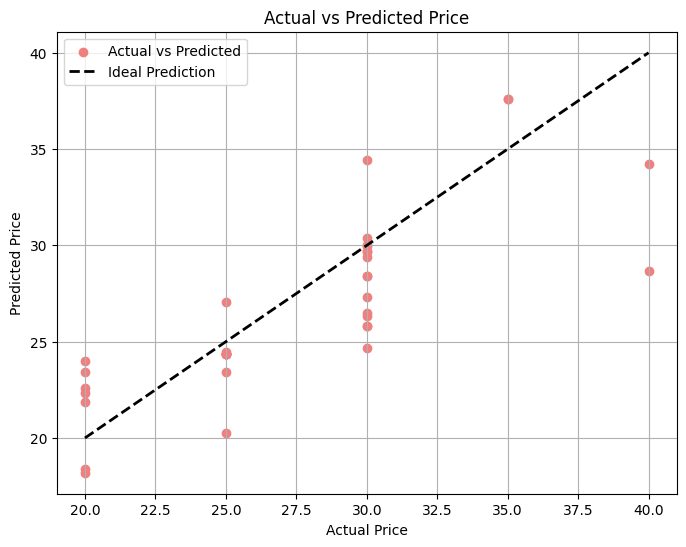

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, color='lightcoral', label='Actual vs Predicted')
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
new_property_data_poly_dict = {
    'Difficulty': [2],
    'Size': [3],
    'Duration_mins': [45],
    'Distance_miles': [15.0]
}


new_property_poly_df = pd.DataFrame(new_property_data_poly_dict)

predicted_price_poly = model2.predict(new_property_poly_df)

print(f'The predicted price for the new property using Polynomial Regression is: £{predicted_price_poly[0]:.2f}')

The predicted price for the new property using Polynomial Regression is: £37.06


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average price per property type
average_price_by_property_type = df.groupby('Property_type')['Price'].mean().sort_values(ascending=False)

# Create a bar plot of the average price per property type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_property_type.index, y=average_price_by_property_type.values, palette='viridis')
plt.title('Average Price per Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Conclusion
Based on the analysis, several job features such as property type, size, duration, and difficulty have a significant impact on the pricing of cleaning jobs. Regression models (Random Forest and Polynomial Regression) show that these variables can be used to reliably estimate a fair price. This approach can help improve consistency, transparency, and profitability in service pricing.

**Next Steps:**
- Improve model accuracy with more data and fine-tuning
- Integrate this analysis into a pricing tool or dashboard for business use
- Explore customer satisfaction or repeat business patterns if data becomes available